# Some Basic Statistics

This module will cover the calculation of some basic statistical parameters using numpy and scipy, starting with a 'by hand' or from textbook formulas and using built-in functions.

By the end of this file you should have seen simple examples of:
1. Mean, standard deviation, and variance
2. Confidence intervals
3. One-way analysis of variance (ANOVA)
4. Student's t-test
5. F-test
6. Coefficient of determination
7. Pearson's correlation coefficient
8. Probability Distribution Functions (PDFs)

Further Reading:  
https://docs.scipy.org/doc/scipy/reference/stats.html  
https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html
https://github.com/scipy/scipy/blob/master/scipy/stats/stats.py  
http://www.itl.nist.gov/div898/handbook/eda/section3/eda3672.htm   
http://www.physics.csbsju.edu/stats/t-test.html  
https://onlinecourses.science.psu.edu/stat501/node/255  
http://originlab.com/doc/Origin-Help/ANOVA-CRD  
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-22.html  

In [1]:
from numpy.random import normal,rand
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

### Mean, Standard Deviation, and Variance

These all give an initial sense of the distribution of a group of samples - the average value (mean) and how spread out they are (standard deviation and variance). 

Keep in mind that the variance is the square of the standard deviation.

In [2]:
# Generate some continuous data:
nums = normal(2, 3, 1000) # function of mean (mu), std (sigma), and size (n)

#### Mean:  
$\mu = \frac{1}{n}\sum_{i=1}^{n} x_i$

#### Standard deviation 
Root of the average squared deviation from the mean (entire population):    
$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (x_i-\mu)^2}$

Root of the average squared deviation from the mean (subset of population):  
$\sigma = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n} (x_i-\mu)^2}$

#### Variance
Average squared deviation from mean:  
$\sigma^2 = \frac{1}{n}\sum_{i=1}^{n} (x_i-\mu)^2$

We can do these calculations manually:

In [3]:
mean = (1/len(nums))*np.sum(nums)
print('The mean is: %g' % mean)

stdev = np.sqrt(1/len(nums) * np.sum((nums - mean)**2))
print('The standard deviation (all samples, or the population) is: %g' % stdev)

stdev = np.sqrt(1/(len(nums)-1) * np.sum((nums - mean)**2))
print('The unbiased standard deviation (a group of samples, or a subset of the population) is: %g' % stdev)

var = (1/len(nums)) * np.sum((nums - mean)**2)
print('The variance is: %g' % var)

The mean is: 1.97953
The standard deviation (all samples, or the population) is: 2.91847
The unbiased standard deviation (a group of samples, or a subset of the population) is: 2.91993
The variance is: 8.51748


Or by using built-in functions:

In [4]:
mean = np.mean(nums)
print('The mean is: %g' % mean)

stdev = np.std(nums)
print('The standard deviation (all samples, or the population) is: %g' \
      % stdev)

stdev = np.std(nums, ddof=1)
print('The standard deviation (a group of samples, or a subset of the population) is: %g' % stdev)

var = np.var(nums)
print('The variance is: %g' % var)

The mean is: 1.97953
The standard deviation (all samples, or the population) is: 2.91847
The standard deviation (a group of samples, or a subset of the population) is: 2.91993
The variance is: 8.51748


## Confidence Intervals

How sure are we that the measurements we've taken encompass the population mean, rather than just the mean of the sample group (assuming it is a subset of the population mean)? **Confidence invervals define bounds on the certainty of a reported value.**

**Starting with a normally distributed group of random samples, we want to state with a known amount of confidence (i.e. 95% confidence) that the reported interval will contain the population mean.**

We report:  
$\mu \pm \sigma_m T$  

where:  
$\mu$ is the mean value  
$T$ is the critical probability (t-value)  
$\sigma_m = \frac{\sigma}{\sqrt{n}}$  is the standard error of the mean  
$\sigma$ is the standard deviation  
$n$ is the number of samples    

Notes:  
  - Technically, it is not correct to state that mean has a 95% chance of being within the confidence inverval (using 95% confidence as an example).  The mean is a number, not a probability.   
  
    **A confidence interval of 95% means that the confidence interval, if repeated with many different groups of samples, would encompass the population mean 95% of the time.** This is a slight distinction: it's not that there is a 95% chance that the value is within that particular confidence interval - it's a statement that the confidence interval, if repeated, would trend towards encompassing the population mean 95% of the time.  
    

  - Assuming the group of samples is a subset and not the entire population, critical probability (t-value) is determined from the t-distribution instead of the normal distribution. This is more accurate for lower sampling because it takes into account the degrees of freedom. Keep in mind the t- and the normal distributions converge for large sampling. 
  
  
  - For more information about determining the critical probability (t-value) from a percentage (i.e. 95%), see the 'Confidence Intervals from a Distribution Perspective' section near the end of this notebook. 

In [5]:
# Start with normally distributed group of samples
grp1 = normal(100, 5, 10000)

In [6]:
# Compute the standard error of the mean
grp1_avg = np.mean(grp1)
grp1_std = np.std(grp1, ddof=1)
standard_err = grp1_std/np.sqrt(np.size(grp1))

# Determine the critical probability that corresponds to 1/2 of the 
# 95% confidence interval (see Distributions)
conf_int = 0.95
dof = len(grp1)-1 # We use the degrees of freedom of n-1 because it's 
                  # a sample of the population
T_val = stats.t.ppf(1-(1-conf_int)/2, dof)  # Use the percent point
                                            # function (inverse of the 
                                            # CDF, more on this later)

# The average value, reported with 95% confidence is:
conf_int = standard_err*T_val
lower_int = grp1_avg - conf_int
upper_int = grp1_avg + conf_int

print("The value is {0:.3g} ± {1:.3g} (95% confidence interval)" \
      .format(grp1_avg, conf_int))
print("or a range of {0:.6g} to {0:.6g}".format(lower_int,upper_int))

The value is 100 ± 0.099 (95% confidence interval)
or a range of 99.8735 to 99.8735


We can also use the built in function for determining the 95% confidence interval:

In [7]:
dof = len(grp1)-1
mean = np.mean(grp1)
std_err = stats.sem(grp1) #sem = standard error (of the) mean

lower_int, upper_int = stats.t.interval(\
        0.95, dof, loc=mean, scale=std_err)
print("A range of {0:.6g} to {0:.6g}".format(lower_int, upper_int))

A range of 99.8735 to 99.8735


## One-Way Analysis of Variance (ANOVA)

How could we determine multiple groups of samples are from the same population or from different populations? One-way analysis assumes a single factor (independent variable) affects the mean value of the group.

Keep in mind that the samples should be independent and interval or ratio data (i.e. not categorical).

### Two groups: Student's T-test

**The goal of the Student's t-test is to determine if two groups of samples are from the same population or different populations.** This comes up frequently when we want to determine if the data we're collected somehow differs from another data set (i.e. we've observed something change (before/after populations), or observe something different from what someone else claims). 

**To do this, first calculate a t-value, and use this t-value (to sample the t-distribution) to determine a measure of how similar the two groups of samples are. This is known as a p-value.** 

The p-value represents the probability that the difference between the groups of samples is observed purely by chance. **A p-value below some threshold (i.e. 0.05) means there is a significant difference between the groups of samples.** 

Increasing t-values (increasingly different groups) lead to p-value decreases (decreasing chances that the samples are from the same distribution). 

Often, this is described in terms of the null hypothesis, or that there is 'null difference' between the two groups of samples. In other words, can the null hypothesis (there is no difference between the two populations) be rejected? The goal is to determine if any difference is due to sampling, experimental, etc. error or if the means really are different.

This is intended for normally distributed, continuous distributions.

*Fun fact*: the 'student' is actually William S. Gossett, a brewmaster who worked at the Guinness brewery. 

In [8]:
from scipy.stats import ttest_ind, ttest_rel

In [9]:
# Three groups of data, but one of these is not like the others.
grp1 = normal(45, 23, 5)
grp2 = normal(45, 23, 5)
grp3 = normal(10, 12, 5)

#### Equal sample sizes, equal variances
$t = \frac{\bar{X}_1 - \bar{X}_2}{s_{pool}\sqrt{\frac{2}{n}}}$  
where:  
$s_{pool}$ = pooled variance  
$s_{pool} = \sqrt{\frac{s_1^2 + s_2^2}{2}}$


$n$ is the number of samples  
$\bar{X}$ is the expectation value (if equal weights, average)   
$s_1^2 = \frac{1}{n-1} \sum^{n}_{1} (x_i-\bar{X})^2$ 


#### Equal or unequal sample sizes, equal variances  
$t = \frac{\bar{X}_1 - \bar{X}_2}{s_{pool}\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$  
where:  
$s_{pool} = \sqrt{\frac{(n_1 -1) s_1^2 + (n_2 -1) s_2^2}{n_1 + n_2 -1}}$

#### Equal or unequal sample sizes, unequal variances
$t = \frac{\bar{X}_1 - \bar{X}_2}{s_\delta}$  
where:  
$s_\delta = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}$  
 
 
 

The p-values can be calculated by integrating the Student's t-distribution cumulative density fuction (CDF) directly - more information is provided in the Distributions section. Alternatively, tables of precalculated CDF values (Z-tables) may be used when calculating CDF isn't practical but aren't discussed here. Below, the survival function (`stats.t(degFreedom).sf`, or '1 - CDF') is used to sample the t-distribution. 

In [10]:
# Get some initial info about the three groups
grp1_siz = float(grp1.size)
grp1_dof = grp1_siz - 1
grp1_avg = np.sum(grp1)/grp1_siz
grp1_var = 1/(grp1_dof)* np.sum((grp1 - grp1_avg)**2)

grp2_siz = float(grp2.size)
grp2_dof = grp2_siz - 1
grp2_avg = np.sum(grp2)/grp2_siz
grp2_var = 1/(grp2_dof)* np.sum((grp2 - grp2_avg)**2)

grp3_siz = float(np.size(grp3))
grp3_avg = np.sum(grp3)/grp3_siz
grp3_dof = grp3_siz - 1
grp3_var = 1/(grp3_dof)* np.sum((grp3 - grp3_avg)**2)

### Calculate the Student's t- and p-values: 

In [11]:
# Equal sample size, assumed equal variance:
pooled_var = np.sqrt( (grp1_var + grp2_var)/2 )
t = (grp1_avg - grp2_avg)/(pooled_var*np.sqrt(2/grp1_siz))

# Calculate p-value:
degFreedom = (grp1_var/grp1_siz + grp2_var/grp2_siz)**2/ \
    ((grp1_var/grp1_siz)**2/grp1_dof + (grp2_var/grp2_siz)**2/grp2_dof)
p = 2*stats.t(degFreedom).sf(np.abs(t)) #  we want 2x the area under the curve,
                                        #  from neg infinity to the neg t value
print(" t = {0:g} p = {1:g}".format(t, p))

 t = 0.796857 p = 0.455421


**The p-value between groups 1 and 2 is greater than our value of 0.05, so we cannot reject the null hypothesis, and assume these are from the same population.**

In [12]:
# Equal or unequal sample size, assumed equal variance:
pooled_var = np.sqrt( (grp1_dof*grp1_var+grp2_dof*grp2_var)/ \
                     (grp1_siz+grp2_siz-2) )
t = (grp1_avg - grp2_avg)/ \
    (pooled_var*np.sqrt(1/grp1_siz + 1/grp2_siz))

# Calculate p-value:
degFreedom = (grp1_var/grp1_siz + grp2_var/grp2_siz)**2/ \
    ((grp1_var/grp1_siz)**2/grp1_dof + (grp2_var/grp2_siz)**2/grp2_dof)
p = 2*stats.t(degFreedom).sf(np.abs(t))
print(" t = {0:g} p = {1:g}".format(t, p))

 t = 0.796857 p = 0.455421


**The p-value between groups 1 and 2 is still greater than our value of 0.05, so we cannot reject the null hypothesis, and assume these are from the same population.**

In [13]:
# Equal or unequal sample size, assumed unequal variance:
var = np.sqrt( grp1_var/grp1_siz + grp3_var/grp3_siz )
t = (grp1_avg - grp3_avg)/var

# Calculate p-value:
degFreedom = (grp1_var/grp1_siz + grp3_var/grp3_siz)**2/ \
    ((grp1_var/grp1_siz)**2/grp1_dof + (grp3_var/grp3_siz)**2/grp3_dof)
p = 2*stats.t(degFreedom).sf(np.abs(t))
print(" t = {0:g} p = {1:g}".format(t, p))

 t = 5.50397 p = 0.00141675


**The p-value between groups 1 and 3 is still greater than our value of 0.05, but is much closer. We can't strictly reject the null hypothesis, but it's worth a closer look. Do we really have enough samples to draw conclusions?**

Or use built-in functions:

In [14]:
# Equal sample size, assumed equal variance:
t, p = ttest_rel(grp1, grp2)
print("ttest_rel   eq_var: t = %g  p = %g" % (t, p))

# Equal or unequal sample size, assumed equal variance:
t, p = ttest_ind(grp1, grp2, equal_var=True)
print("ttest_ind   eq_var: t = %g  p = %g" % (t, p))

# Note that the first and second t-tests converge as sampling 
#    approaches infinity.

# Equal or unequal sample size, assumed unequal variance:
t, p = ttest_ind(grp1, grp3, equal_var=False)
print("ttest_ind uneq_var: t = %g  p = %g" % (t, p))

ttest_rel   eq_var: t = 0.731361  p = 0.505097
ttest_ind   eq_var: t = 0.796857  p = 0.448535
ttest_ind uneq_var: t = 5.50397  p = 0.00141675


If the p-value is smaller than some threshold (i.e. 0.01 or 0.05, etc.) then the null hypothesis can be rejected. The two groups of samples have different means! Note that the first and second tests converge as sampling approaches infinity.

**The goal of the Student's t-test is to determine if two groups of samples are from the same population or different populations.** This comes up frequently when we want to determine if the data we're collected somehow differs from another data set (i.e. we've observed something change (before/after populations), or observe something different from what someone else claims). 

**To do this, first calculate a t-value, and use this t-value (to sample the t-distribution) to determine a measure of how similar the two groups of samples are. This is known as a p-value.** 

The p-value represents the probability that the difference between the groups of samples is observed purely by chance. **A p-value below some threshold (i.e. 0.05) means there is a significant difference between the groups of samples.** 

Increasing t-values (increasingly different groups) lead to p-value decreases (decreasing chances that the samples are from the same distribution). 

Often, this is described in terms of the null hypothesis, or that there is 'null difference' between the two groups of samples. In other words, can the null hypothesis (there is no difference between the two populations) be rejected? The goal is to determine if any difference is due to sampling, experimental, etc. error or if the means really are different.

This is intended for normally distributed, continuous distributions.

*Fun fact*: the 'student' is actually William S. Gossett, a brewmaster who worked at the Guinness brewery. 

### >2 Groups: One-way ANOVA F-test statistic

The F-test can be thought of as the generalized form of the t-test for multiple groups of samples. **A popular use of the F-test is to determine if one group of samples is from a different population than all other groups (i.e. one vs many), or if all are from the same population.** While there are several different F-tests, the focus here is on a test to determine if the means of a given set of normally distributed values are equal. 

**To do this, first calculate a F-statistic, and use this F-statistic (to sample the F-distribution) to find the chance that all of the groups of samples are from the same population. Like with T-tests above, we call this sample the p-value.** 

The p-value represents the chance that the difference between the groups of samples is observed purely by chance. **A p-value below some threshold (i.e. 0.05) means that there is a significant difference between the groups of samples.** 

Here, the F-statistic is the ratio of variation between sample means to the variation within the samples. Increasing F-statistics lead to decreasing the p-values (decreasing chances that the samples are from the same distribution).

Often, this is described in terms of the null hypothesis, or the hypothesis that there is null difference between the groups of samples. In other words, can the null hypothesis (all groups are from the same population) be rejected? The goal is to determine if the differencs are due to sampling, experimental, etc. error or if the means really are different. 

This is intended for normally distributed, continuous distributions.

In [15]:
grp1 = normal(45, 23, 500)
grp2 = normal(45, 23, 500)
grp3 = normal(10, 12, 500)

Here, we use:

$F_{stat} = \frac{\text{between set variability}}{\text{within set variability}}$  

where:  
between set variability = $\sum^{K}_{i=1} \frac{n_i(\bar{X_i} -\bar{X})^2}{K - 1}$  
within set variability = $\sum^{K}_{i=1} \sum^{n_i}_{j=1} \frac{(X_{ij} -\bar{X_i})^2}{N - K}$  

and:  
$\bar{X}$ is the mean of all data  
$\bar{X_i}$ is the mean of set $i$  
$K$ is the number of sets  
$N$ is the overall sample size  

In [16]:
all_grps = [grp1, grp2, grp3] # Use some vectorization to simplify 
                              # code

num_grps = float(len(all_grps))
alldata = np.concatenate(all_grps)
alldata_avg = np.mean(alldata)
alldata_siz = np.size(alldata)

bgv = 0
for a in all_grps:
    bgv += (np.size(a) * (np.mean(a)-alldata_avg)**2)/(num_grps-1)

wgv = 0
for a in all_grps:
    for i in a:
        wgv += (i - np.mean(a))**2/(alldata_siz - num_grps)

f_stat = bgv/wgv

prob = stats.f(num_grps-1, alldata_siz-num_grps).sf(np.abs(f_stat))

print('F-statistic is %g p is %g' % (f_stat, prob))

F-statistic is 472.298 p is 9.54156e-160


In [17]:
f, p = stats.f_oneway(grp1,grp2,grp3)

print('F-statistic is %g p is %g' % (f, p))

F-statistic is 472.298 p is 9.54156e-160


### Coefficient of Determination ($R^2$)

**The coefficient of determination is a measure of how closely one group of samples (i.e. measured) follows another (i.e. a model).** This is accomplished via the proportion of total variation of outcomes explained by the model.

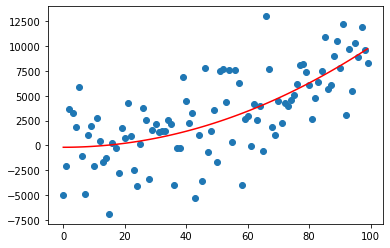

In [18]:
from scipy.optimize import curve_fit

# Create arbitrary function 
x_vals = np.arange(0, 100)
y_vals = x_vals**2 + normal(0, 3000, np.size(x_vals))

# Fit and create fit line
def func(x_vals, B, C):
    return x_vals**B + C
opt, cov = curve_fit(func, x_vals, y_vals)
x_fitted = np.linspace(0, max(x_vals), 100)
y_fitted = func(x_fitted, *opt)

# Show fit
plt.scatter(x_vals, y_vals)
plt.plot(x_fitted, y_fitted, color='red')
plt.show()

Compute by hand:


$R^2 = \frac{SS_{regr}}{SS_{total}}$  

where:   
$SS$ = "sum of squares"  
$_{rgr}$ = "regression"  
$SS_{regr} = \sum^{n}_{1} (\hat{x_i}-\bar{X})^2$  
$SS_{total} = \sum^{n}_{1} (x_i-\bar{X})^2$  

and:  
$\hat{x_i}$ is the fitted value  
$\bar{X}$ is the average value of X  
$x_i$ is the measured value of x  

In [19]:
y_avg = np.mean(y_vals)
y_fit = func(x_vals, *opt)

SSregr  = np.sum( (y_fit  - y_avg )**2 )
SSerror = np.sum( (y_vals - y_fit )**2 )
SStotal = np.sum( (y_vals - y_avg )**2 )

Rsq = SSregr/SStotal
print('R squared is: %g' % Rsq)

R squared is: 0.486227


### Pearson's correlation coefficient

**For two sets of data, how correlated are the two, on a scale of -1 to 1?** 

**A p-value for the Pearson's correlation coefficient can also be determined**, indicating the probability of an uncorrelated system producing data that has a Pearson correlation at least as extreme (as with everything, it's not reliable for small groups of samples).

Keep in mind that the correlation coefficient is defined for data sets of the same size.

In [20]:
from scipy.stats import pearsonr

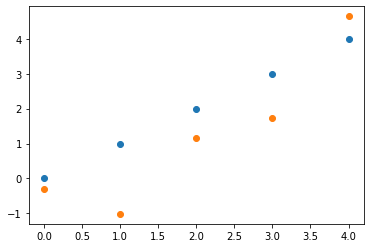

In [21]:
grp1 = list(range(0, 5))
grp2 = grp1+normal(0, 1, np.size(grp1))

plt.scatter(grp1, grp1)
plt.scatter(grp1, grp2)
plt.show()

Again we can do this by hand, noting that $\rho$ is different from $p$:

$\rho = \frac{ \sum^{n}_{1} (1/n) (X_1 - \bar{X}_1) (X_2 - \bar{X}_2)}{s_1^2 s_2^2}$  

The p value can be determined by converting $\rho$ to a student's t and then determining the area under the distribution function:

$t_{conv} = \frac{\rho}{\sqrt{( 1-\rho^2) / (n-2)}} $


In [22]:
grp1_siz = float(np.size(grp1))
grp1_avg = np.sum(grp1)/grp1_siz
grp1_std = np.sqrt((1/grp1_siz) * np.sum((grp1 - grp1_avg)**2)) 

grp2_siz = float(np.size(grp2))
grp2_avg = np.sum(grp2)/grp2_siz
grp2_std = np.sqrt((1/grp2_siz) * np.sum((grp2 - grp2_avg)**2)) 

dof = grp1_siz - 2


# Note that the size of the two samples must be the same
pearson_r = np.sum( 1/grp1_siz*(grp1 - grp1_avg)*(grp2 - grp2_avg) ) / \
    (grp1_std * grp2_std)

t_conv = pearson_r/np.sqrt( (1 - pearson_r**2)/(grp1_siz - 2) ) 
    # convert to student's t value
p = 2*stats.t(dof).sf(np.abs(t_conv)) # survival function of the t-dist

print("pearson_r = %g  p = %g" % (pearson_r, p))

pearson_r = 0.909854  p = 0.0320472


**We have a very high Pearson's correlation coefficient (highly correlated) with a low p-value (can reject null hypothsis that it's due purely due to chance).** Howeever, we don't have many samples, so it's not a robust conclusion.

Or use built-in functions:

In [23]:
r,p = pearsonr(grp1, grp2)

print("pearson_r = %g  p = %g" % (r, p))

pearson_r = 0.909854  p = 0.0320472


### Distributions

**Distribution functions can be thought of as the probability of measuring a particular sample value.** To get a better picture of how frequently a type of randomly distributed variable should be measured in theory, we can use the analytical distribution function. 

For example, perhaps the most well known distribution is the Gaussian, Normal, or Bell-Curve distribution. This is determined from a set of gaussian distributed random numbers. We can generate a lot of these numbers and plot the frequency of each number within a set of 'bins':

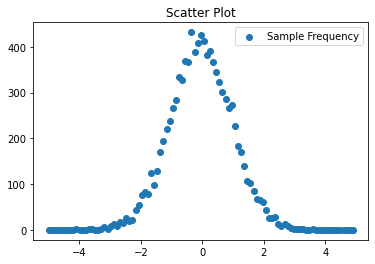

In [24]:
num_samples = 10000
span = 10 # How wide to plot and bin
rand_gen = normal(0, 1, num_samples)        # Generate num_sample numbers
bins = np.linspace(-span/2, span/2, num=100)
histogram = np.histogram(rand_gen, bins);  # Use histogram to get the
                                          # distribution

X = histogram[1][:-1]
Y = histogram[0]
plt.scatter(X,Y, label="Sample Frequency")
plt.legend(loc='best')
plt.title('Scatter Plot')
plt.show()

The probability distribution function (PDF) is a function that represents the probability of obtaining a particular value for a population that follows that particular distribution.  

Using a conversion factor, it's clear that the two overlap:

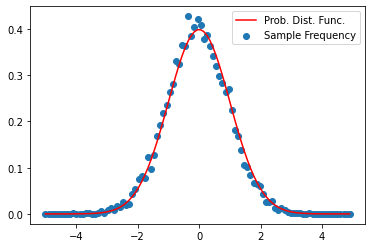

In [25]:
Y_pdf = stats.norm.pdf(X)                 # PDF function applied to the 
                                          # X values
conv_factor = len(X)/(float(span) * float(num_samples))
                                          # Use a normalization factor to 
                                          # demonstrate the two are 
                                          # overlapped
plt.scatter(X,Y*conv_factor, label="Sample Frequency")
plt.plot(X,Y_pdf, color='red', label="Prob. Dist. Func.")
plt.legend(loc='best')
plt.show()

A common use of distributions is to determine the chance of measuring a value of at least some amount. Instead of looking at the probability of obtaining exactly a value, we can ask: what is the probability of obtaining something at least as large?

All we need is the integration of the PDF, known as the cumulative distribution function (CDF), as we're really looking for the area under the PDF up to a certain point.

Continuing our example:

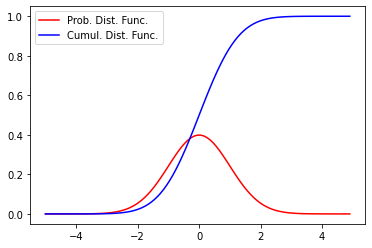

In [26]:
X_dof = np.size(X) - 1
Y_pdf = stats.norm.pdf(X) 
Y_cdf = stats.norm.cdf(X) 

plt.plot(X,Y_pdf, color='red', label="Prob. Dist. Func.")
plt.plot(X,Y_cdf, color='blue', label="Cumul. Dist. Func.")
plt.legend(loc='best')
plt.show()

For those that are wondering, the CDF is actually less than the PDF at a certain point because both scaled but in different ways - the CDF is scaled such that it's maximum value is one but the PDF is such that the area beneath it is one. For more information, look into the integral of the PDF.

We use the CDF to determine the percent chance of obtaining something at least as large, i.e. what is the percent chance of getting at least 2?

In [27]:
stats.norm.cdf(2)

0.9772498680518208

### PDF of Student's t-distribution

This doesn't seem that interesting until we consider the distributions used in the ANOVA analysis above. Here we use the Student's t-distribution, which is extremely similar to the normal distribution except that it incorporates the fact that we often use a subset of the population (and thus degrees of freedom = n-1):

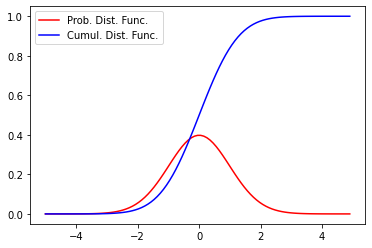

In [28]:
dof = np.size(X) - 1
Y_t_pdf = stats.t(dof).pdf(X)
Y_t_cdf = stats.t(dof).cdf(X) 

plt.plot(X, Y_t_pdf, color='red', label="Prob. Dist. Func.")
plt.plot(X, Y_t_cdf, color='blue', label="Cumul. Dist. Func.")
plt.legend(loc='best')
plt.show()

Let's say our t-value is: -1.47254. 

**A note about two-tailed tests:** We're interested if we can reject the null hypothesis, or if the populations are the same. The t-value can be positive or negative (depending on the two means) but we're only interested only if it is different (not only + or only - difference, but both). To determine the p-value, we sample from both sides of the distribution, and this is known as a two-tailed test.

For the p-value of the t-test (two-tailed), we're concerned with getting the the value under both sides of the distribution. Here we're ignoring the sign of the t-value and treating it as a negative value for a zero-mean t-distribution probability distribution function.

For the two-tailed p-value on a t-test:

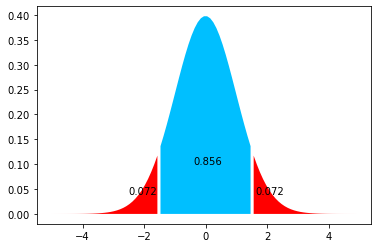

In [29]:
t = -1.47254 # Use a specified t-value

# Use CDF to determine probabilities
left_prob    = stats.t(dof).cdf(-np.abs(t))     
right_prob   = stats.t(dof).sf(np.abs(t)) # The survival function is 1-CDF
between_prob = 1-(left_prob+right_prob)

# Plot t-distribution, highlighting the different plot areas
left_ind    = X <= -np.abs(t)
right_ind   = X >= np.abs(t)
between_ind = (X > -np.abs(t)) & ( X < np.abs(t))

plt.fill_between(X[left_ind],stats.t(dof).pdf(X[left_ind]), facecolor='red')
plt.fill_between(X[right_ind],stats.t(dof).pdf(X[right_ind]), facecolor='red')
plt.fill_between(X[between_ind],stats.t(dof).pdf(X[between_ind]),facecolor='deepskyblue')

# Label the plot areas
plt.text(x=1.7*t,y=0.04, s='%0.3g' % left_prob)
plt.text(x=-0.4,y=0.1,s='%0.3g' % between_prob)
plt.text(x=1.1*-t,y=0.04, s='%0.3g' % right_prob)
plt.show()

The two-tailed test (i.e. including both sides) is simply 2x the value of the area of one of the sides:

In [30]:
p = 2*stats.t(dof).sf(np.abs(t))
print("%g" % p)

0.14408


## Confidence Intervals from a Distribution Perspective 
This is where the critical probability (t-value) for the confidence interval comes from. **Working backwards, we're interested the value of the probability distribution function that, when sampled, encompasses $\frac{1}{2}$ of the confidence interval (i.e. 95%) area under the function.** 

To do so, 1/2 of the confidence interval on each side of the distribution is removed, and the corresponding t-value is determined.

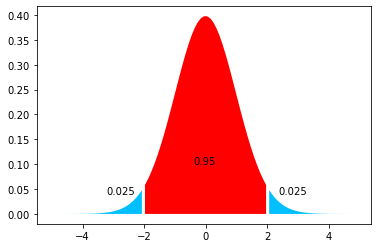

The t_value that can be used in the 95 percent confidence interval is: 1.9602


In [31]:
conf_int = 0.95 # Use a specified confidence interval 
                #    (i.e. % of total CDF area)

# We use the t-distribution in lieu of the normal distribution because 
#    the samples are a subset of the population the inverse of the CDF 
#    for the normal distribution is known as the percent point function
t_value = stats.t.ppf(1-(1-conf_int)/2,dof)

# Use CDF to check that probabilities are correct
left_prob    = stats.t.cdf(-t_value, dof)     
right_prob   = stats.t.sf(t_value, dof) # The survival function is 1-CDF
between_prob = 1-(left_prob+right_prob)

# Plot T distribution, highlighting the different plot areas
left_ind    = X <= -t_value
right_ind   = X >= t_value
between_ind = (X > -t_value) & ( X < t_value)

plt.fill_between(X[left_ind],stats.t.pdf(X[left_ind],dof), facecolor='deepskyblue')
plt.fill_between(X[right_ind],stats.t.pdf(X[right_ind],dof), facecolor='deepskyblue')
plt.fill_between(X[between_ind],stats.t.pdf(X[between_ind],dof),facecolor='red')

# Label the plot areas
plt.text(x=2.2*t,y=0.04, s='%0.3g' % left_prob)
plt.text(x=-0.4,y=0.1,s='%0.3g' % between_prob)
plt.text(x=1.6*-t,y=0.04, s='%0.3g' % right_prob)
plt.show()

print("The t_value that can be used in the 95 percent confidence interval is: %0.6g" % T_val)